# Supported learning with Scikit Learn library.

### Libraries

- [scikit-learn] (http://scikit-learn.org/stable/)
- pandas
- matplotlib

The goal of today’s exercise is to learn how to use the basic functionalities of the scikit-learn library to train a supported machine learning model. The models we will process are Linear Regression, $k$ Neighbor Neighbors, Logistic Regression, and Random Forests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report
%matplotlib inline


# Linear regression - Predicting sales from the cost of advertising

## Data

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

Visualize the relationship between the features and the response

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

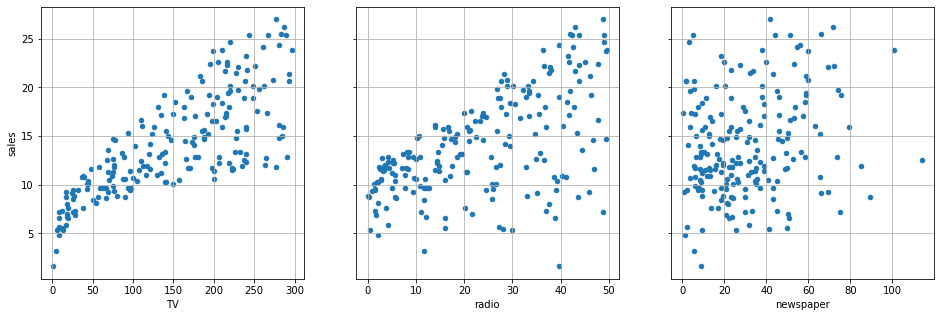

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales',
          ax=axs[0], figsize=(16, 5), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)


## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

Questions:
- With how many parameters is a function described?
- What would each of these parameters represent in this picture?

## Training the model

Let's first divide the data into a feature matrix (X) and a class vector (y)

In [4]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


It is a good idea to check for missing data in the dataset.

In [5]:
X.isna().sum(axis=0)

TV           0
radio        0
newspaper    0
dtype: int64

**Scikit-learn** provides an easy way to train the model

In [6]:
model = LinearRegression()  # create the model
model.fit(X, y)  # train it

LinearRegression()

Let's see how the formula looks like

In [7]:
print(f"{model.intercept_:.3}", end="")
for coef, feature in zip(model.coef_, feature_cols):
    print(f" + {coef:.3} * {feature}", end="")

2.94 + 0.0458 * TV + 0.189 * radio + -0.00104 * newspaper


$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.94 + 0.0458 \times TV + 0.189  \times radio + -0.00104  \times newspaper$$


In [8]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y_pred = cross_val_predict(lr, X, y, cv=5)


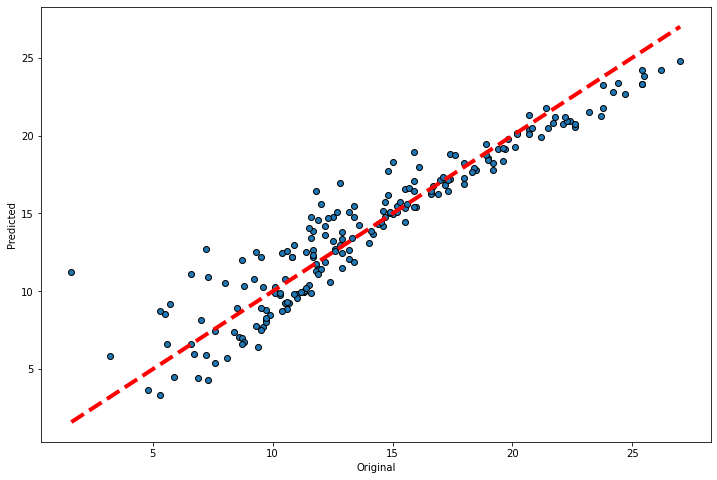

error = 3.0729465971002092


In [9]:

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

print(f"error = {mean_squared_error(y, y_pred)}")

Additional information about cross validation - https://en.wikipedia.org/wiki/Cross-validation_(statistics)

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

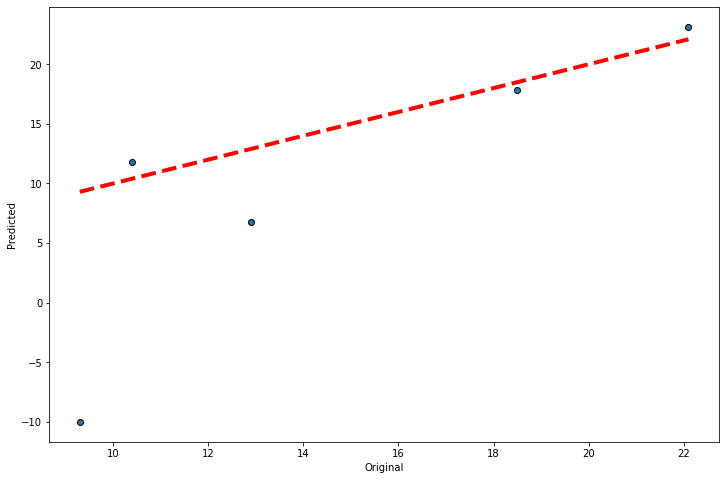

error = 82.77419262404145


In [10]:
N = 5
X_s = X[:N]
y_s = y[:N]

lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y_pred = cross_val_predict(lr, X_s, y_s, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_s, y_pred, edgecolors=(0, 0, 0))
ax.plot([min(y_s), max(y_s)], [min(y_s), max(y_s)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

print(f"error = {mean_squared_error(y_s, y_pred)}")


**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model.

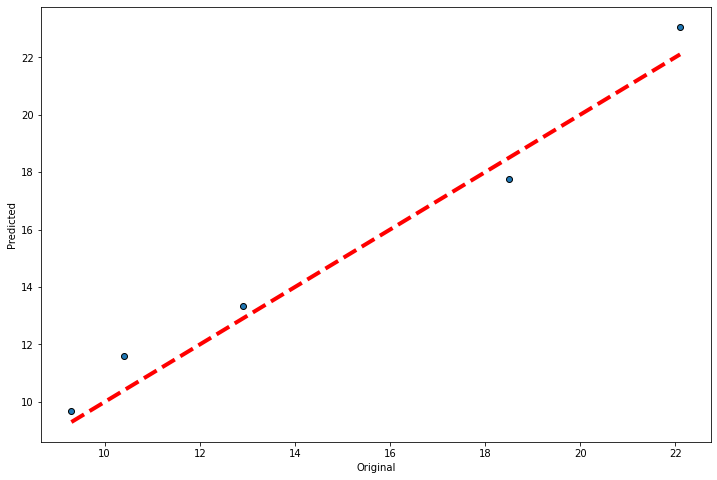

error = 0.6442462580572375


In [11]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y_pred = cross_val_predict(ridge, X_s, y_s, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_s, y_pred, edgecolors=(0, 0, 0))
ax.plot([min(y_s), max(y_s)], [min(y_s), max(y_s)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

print(f"error = {mean_squared_error(y_s, y_pred)}")


# Logistic Regression - Predicting the probability of the survival of the Titanic disaster

For this we will use the data available on _Encyclopedia Titanica_.

## Data

In [12]:
data = pd.read_excel('data/titanic.xls')
data

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1305,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1307,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


What are the **features**?
- name: Name of the passenger
- sex: Male or Female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Ticket price
- cabin: Cabin number
- embarked: Port of Embarkation

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [13]:
dead = data[data['survived'] == 0]
survived = data[data['survived'] == 1]

print("Survived {0}, Dead {1}".format(len(survived), len(dead)))
print("Survived {:.2%}".format(len(survived)/len(data)))

Survived 500, Dead 809
Survived 38.20%


For the purposes of this exercise, we will take only some of the features and assume that the others are not predictive.

In [14]:
feature_cols = ['sex', 'age', 'sibsp', 'parch', 'fare']
X = pd.get_dummies(data[feature_cols])
y = data.survived


In [15]:
X.isna().sum(axis=0)

age           263
sibsp           0
parch           0
fare            1
sex_female      0
sex_male        0
dtype: int64

Let's try to fix the data with a basic imputation method: replacing the missing values with the mean.

More info: https://en.wikipedia.org/wiki/Imputation_(statistics)

In [16]:
X = X.fillna(X.mean())
X.isna().sum(axis=0)


age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

Model training and classification report

In [17]:
logistic = LogisticRegression()
y_pred = cross_val_predict(logistic, X,  y, cv=10)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       809
           1       0.72      0.68      0.70       500

    accuracy                           0.77      1309
   macro avg       0.76      0.76      0.76      1309
weighted avg       0.77      0.77      0.77      1309



If logistic regression is a classifier, then why is it called regression?

Logistic regression uses a threshold on the probability to decide at which class to assign a prediction. In some cases, we are interested to understand how the model behaves at different levels of this threshold.

Let's give a look at the ROC curve!
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Text(0.5, 1.0, 'ROC Curve - Area = 0.80295')

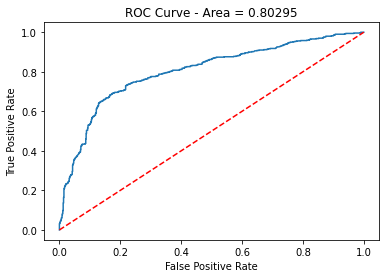

In [18]:
# Predict the probabilities with a cross validationn
y_pred_proba = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score))

In [19]:
logistic.fit(X, y)

LogisticRegression()

In [20]:
test = pd.DataFrame([
    [25, 0, 0, 100, 0, 1], # 25 year old man
    [25, 0, 0, 100, 1, 0], # 25 year old woman
], columns=X.columns)

logistic.predict(test)

array([0, 1])

In [21]:
logistic.predict_proba(test)

array([[0.5528599 , 0.4471401 ],
       [0.09632673, 0.90367327]])

# Random forest - data from the Titanic

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

number_trees = [n for n in range(1, 21)]

accuracy_scores = []
f1_scores = []


for nt in number_trees:
    clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    y_pred = cross_val_predict(clf, X, y, cv=5)

    accuracy_scores.append(accuracy_score(y, y_pred))
    f1_scores.append(f1_score(y, y_pred))

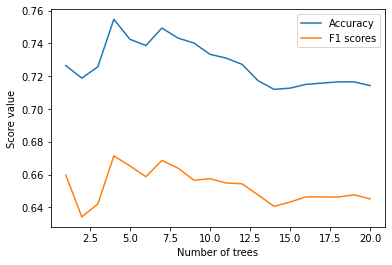

In [23]:
fig, ax = plt.subplots(1, figsize=(6, 4))

ax.plot(number_trees, accuracy_scores, label="Accuracy")
ax.plot(number_trees, f1_scores, label="F1 scores")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()


# Brief overview of the operation of the k-NN model

It is first necessary to generate complex shapes to demonstrate the operation of the k-NN model.

Text(0.5, 1.0, 'Circles')

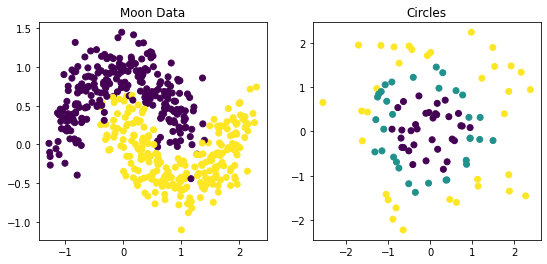

In [24]:
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(500, noise=0.2, random_state=0)
X_circles, y_circles = make_gaussian_quantiles(n_samples=100, random_state=0)


fig, axs = plt.subplots(1, 2, figsize=(9,4))

axs[0].scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
axs[0].set_title('Moon Data')

axs[1].scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
axs[1].set_title('Circles')

In [25]:
# Plotting helper 
# Source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from matplotlib.colors import ListedColormap

def plot_prediction(model, X, y, ax, K):
    # step size in the mesh
    h = .02
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("K = {}".format(K))

Create the models for both dataset with k=1 and K=15.

In [26]:
# K = 1
clf_moons_1 = KNeighborsClassifier(1)
clf_moons_1.fit(X_moons, y_moons)
clf_circles_1 = KNeighborsClassifier(1)
clf_circles_1.fit(X_circles, y_circles)

# K = 15
clf_moons_15 = KNeighborsClassifier(15)
clf_moons_15.fit(X_moons, y_moons)
clf_circles_15 = KNeighborsClassifier(15)
clf_circles_15.fit(X_circles, y_circles)

KNeighborsClassifier(n_neighbors=15)

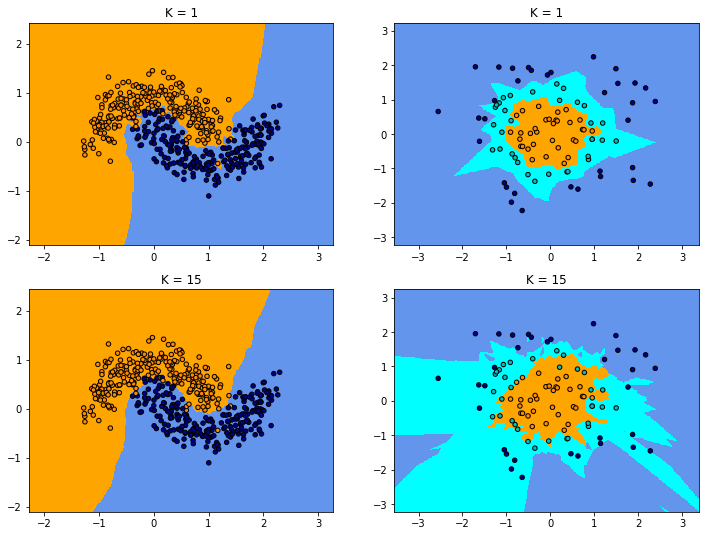

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))

plot_prediction(clf_moons_1, X_moons, y_moons, axs[0][0], 1)
plot_prediction(clf_circles_1, X_circles, y_circles, axs[0][1], 1)

plot_prediction(clf_moons_15, X_moons, y_moons, axs[1][0], 15)
plot_prediction(clf_circles_15, X_circles, y_circles, axs[1][1], 15)